<a href="https://colab.research.google.com/github/cisnux-seed/machine-learning-course/blob/main/week_4/data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
import numpy as np

In [2]:
# Menggunakan path dari Google Drive
file_path = '/content/drive/MyDrive/sample_data/diamonds.csv'
# Membaca dataset CSV menjadi dataframe
df = pd.read_csv(file_path)
# Menampilkan lima baris pertama dari dataframe
print(df.head())

   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [4]:
# Menampilkan jumlah nilai unik untuk setiap fitur
features = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x']
for feature in features:
  print(f"Jumlah unique value for {feature}: {df [feature] .nunique()}")

Jumlah unique value for carat: 273
Jumlah unique value for cut: 5
Jumlah unique value for color: 7
Jumlah unique value for clarity: 8
Jumlah unique value for depth: 184
Jumlah unique value for table: 127
Jumlah unique value for price: 11602
Jumlah unique value for x: 554


In [5]:
# MengeLompokkan numerical features
numerical_features = ['carat', 'depth', 'table', 'x','y', 'z']
# Mengelompokkan categorical features
categorical_features = ['cut', 'color', 'clarity']
# Mengelompokkan target
target = ['price']
# Menampilkan hasil pengelompokkan
print ("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)
print ("Target:", target)

Numerical Features: ['carat', 'depth', 'table', 'x', 'y', 'z']
Categorical Features: ['cut', 'color', 'clarity']
Target: ['price']


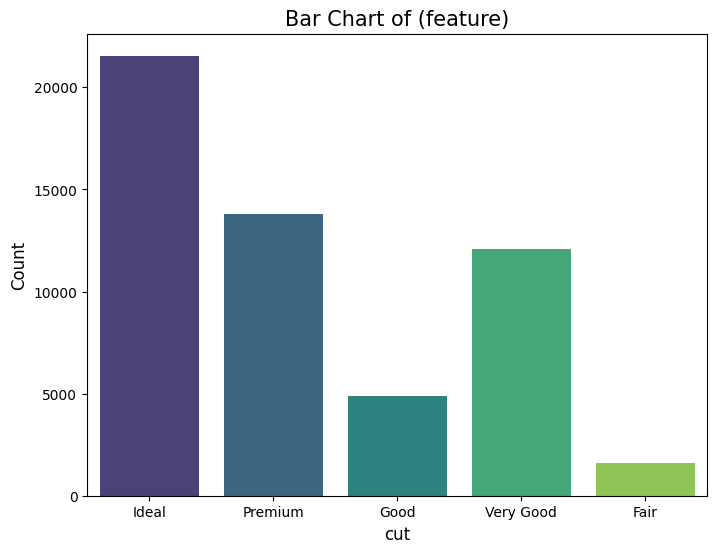

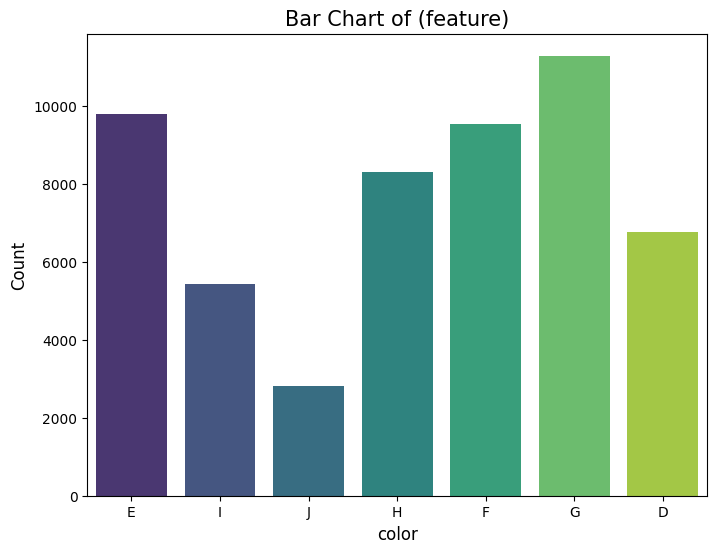

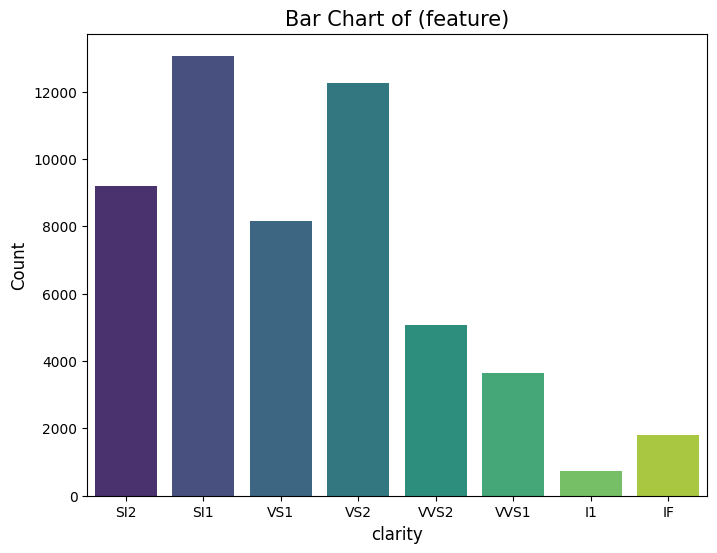

In [6]:
# Membuat bar chart untuk setiap fitur kategorikal
for feature in categorical_features:
  plt.figure(figsize=(8,6))
  sns.countplot(x=feature, data=df, palette='viridis')
  plt.title(f'Bar Chart of (feature)', size=15)
  plt.xlabel(feature, size=12)
  plt.ylabel('Count', size=12)
  plt.show()

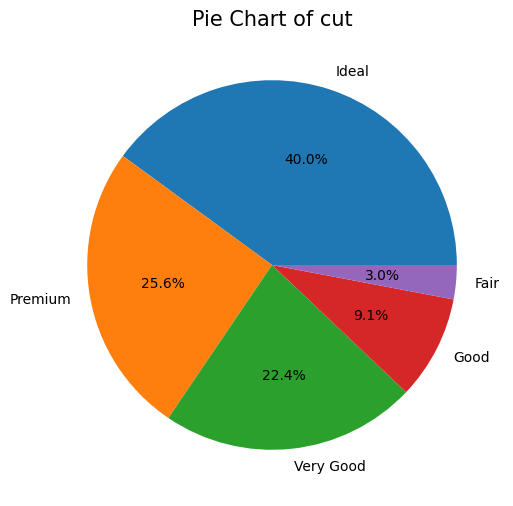

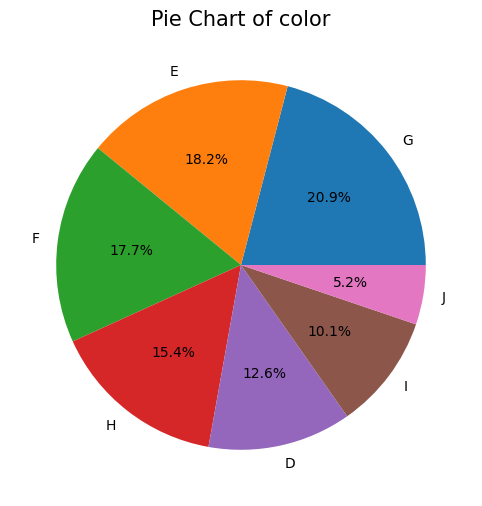

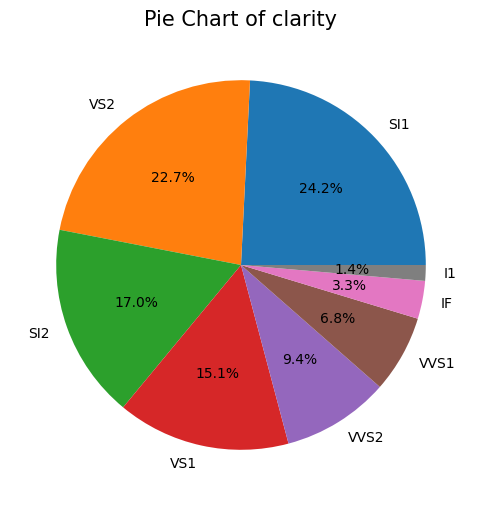

In [7]:
for feature in categorical_features:
  plt.figure(figsize=(8, 6))
  df[feature].value_counts().plot(kind='pie', autopct='%1.1f%%')
  plt.title(f'Pie Chart of {feature}', size=15)
  plt.ylabel('')
  plt.show()

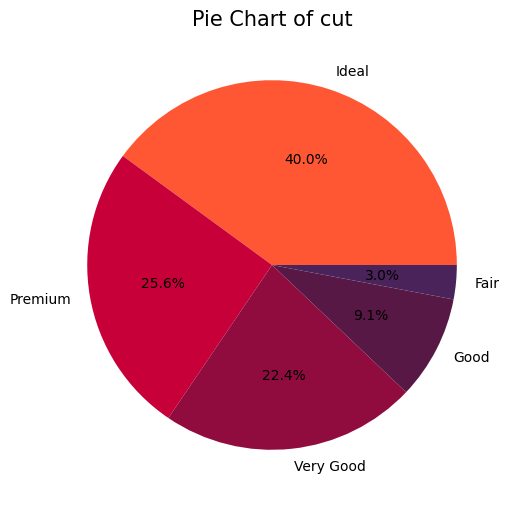

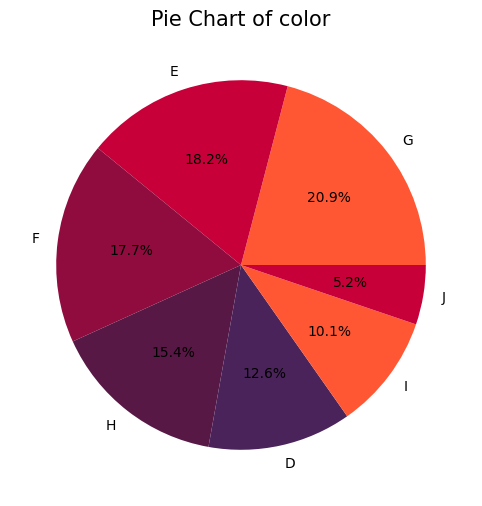

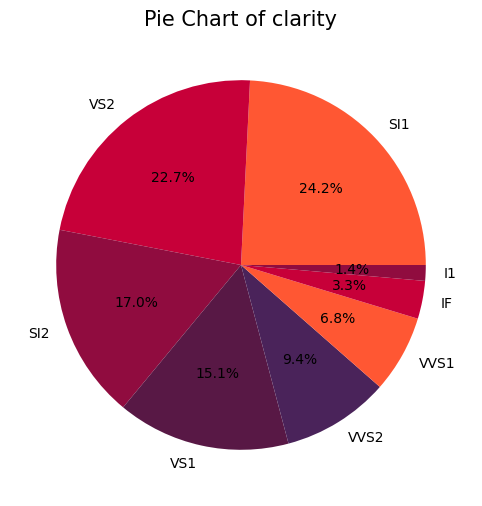

In [8]:
# Membuat pie chart untuk setiap fitur kategorikal dengan warna gelap
dark_colors = ['#FF5733', '#C70039','#900C3F', '#581845', '#4A235A']
for feature in categorical_features:
  plt.figure(figsize=(8, 6))
  df[feature].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=dark_colors)
  plt.title(f'Pie Chart of {feature}', size=15)
  plt.ylabel('')
  plt.show()

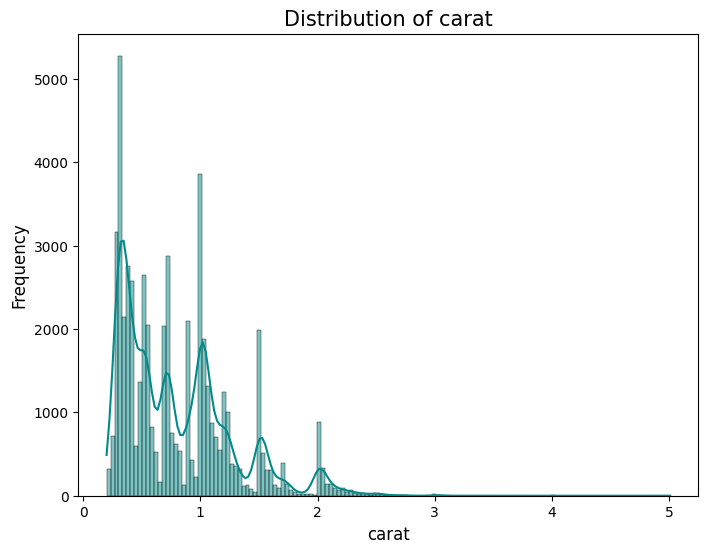

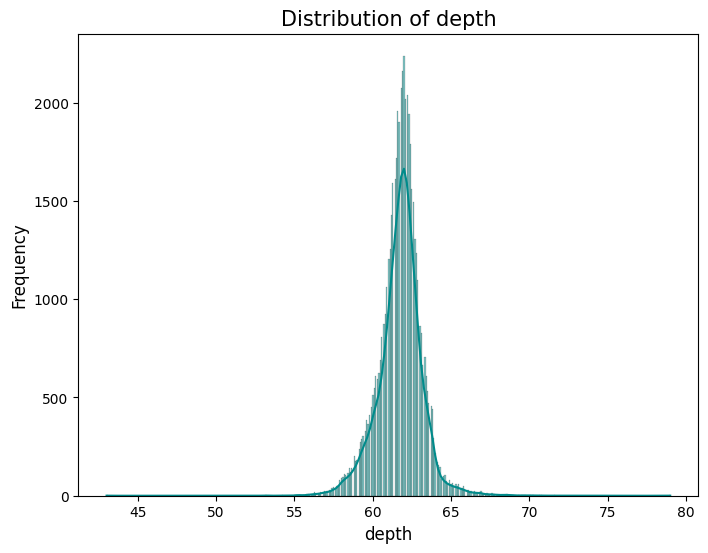

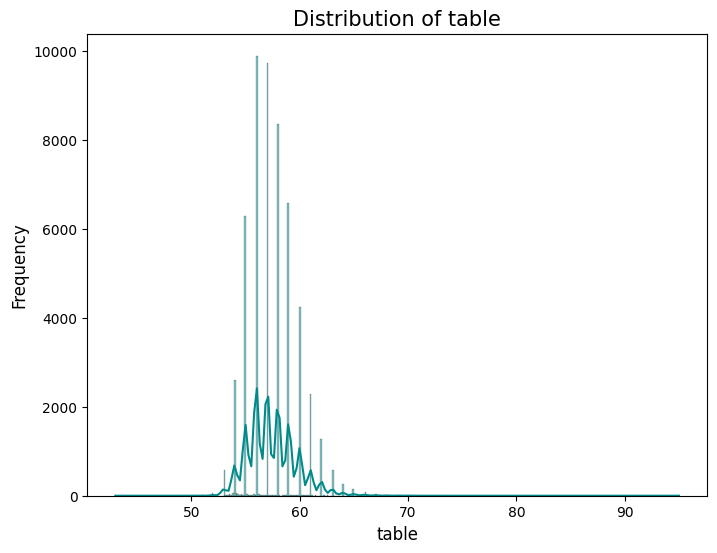

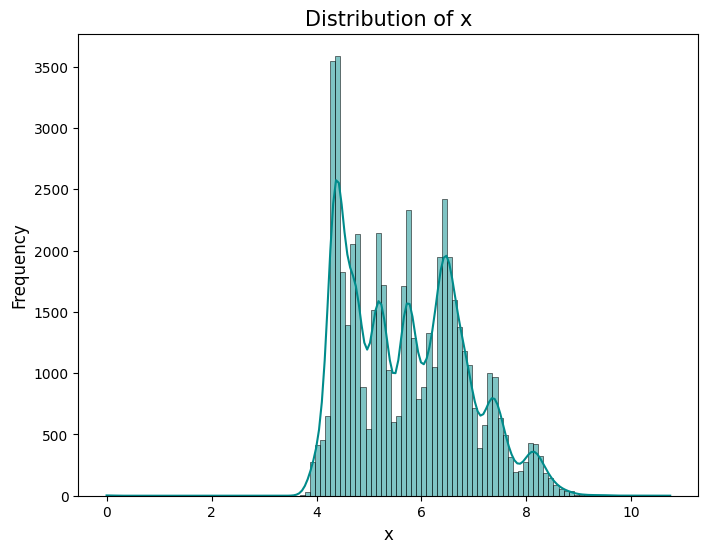

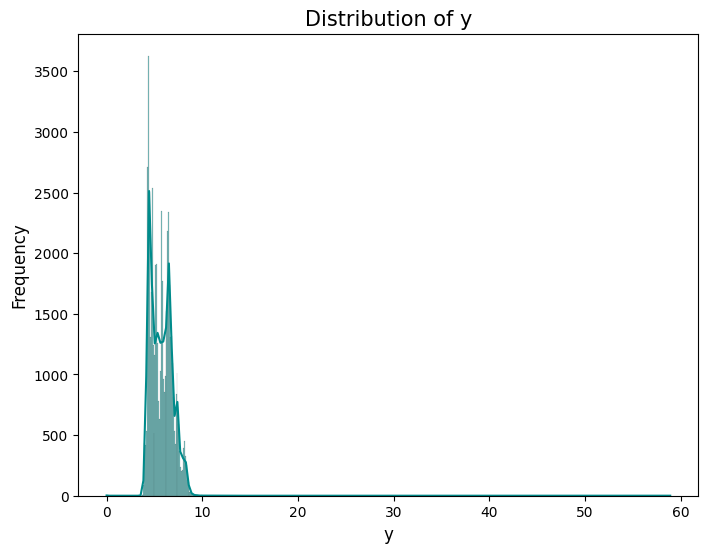

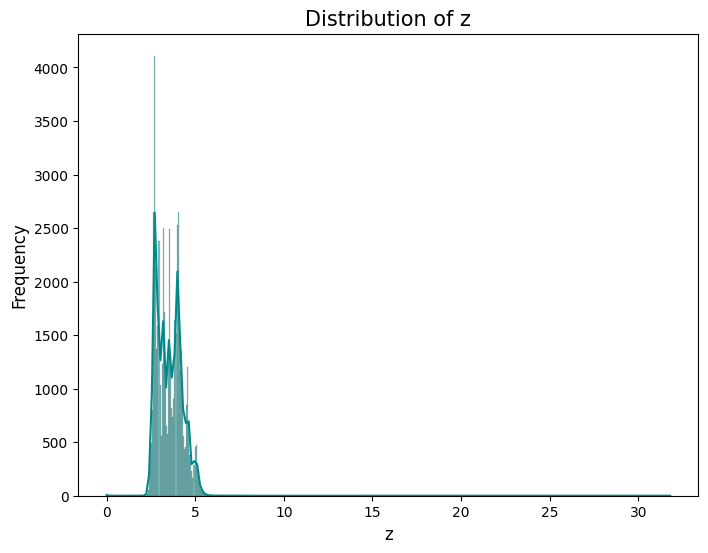

In [9]:
# Membuat distribusi untuk setiap fitur numerik
for feature in numerical_features:
  plt.figure(figsize=(8, 6))
  sns.histplot(df[feature], kde=True, color='darkcyan')
  plt.title(f'Distribution of {feature}', size=15)
  plt.xlabel(feature, size=12)
  plt.ylabel('Frequency', size=12)
  plt.show()

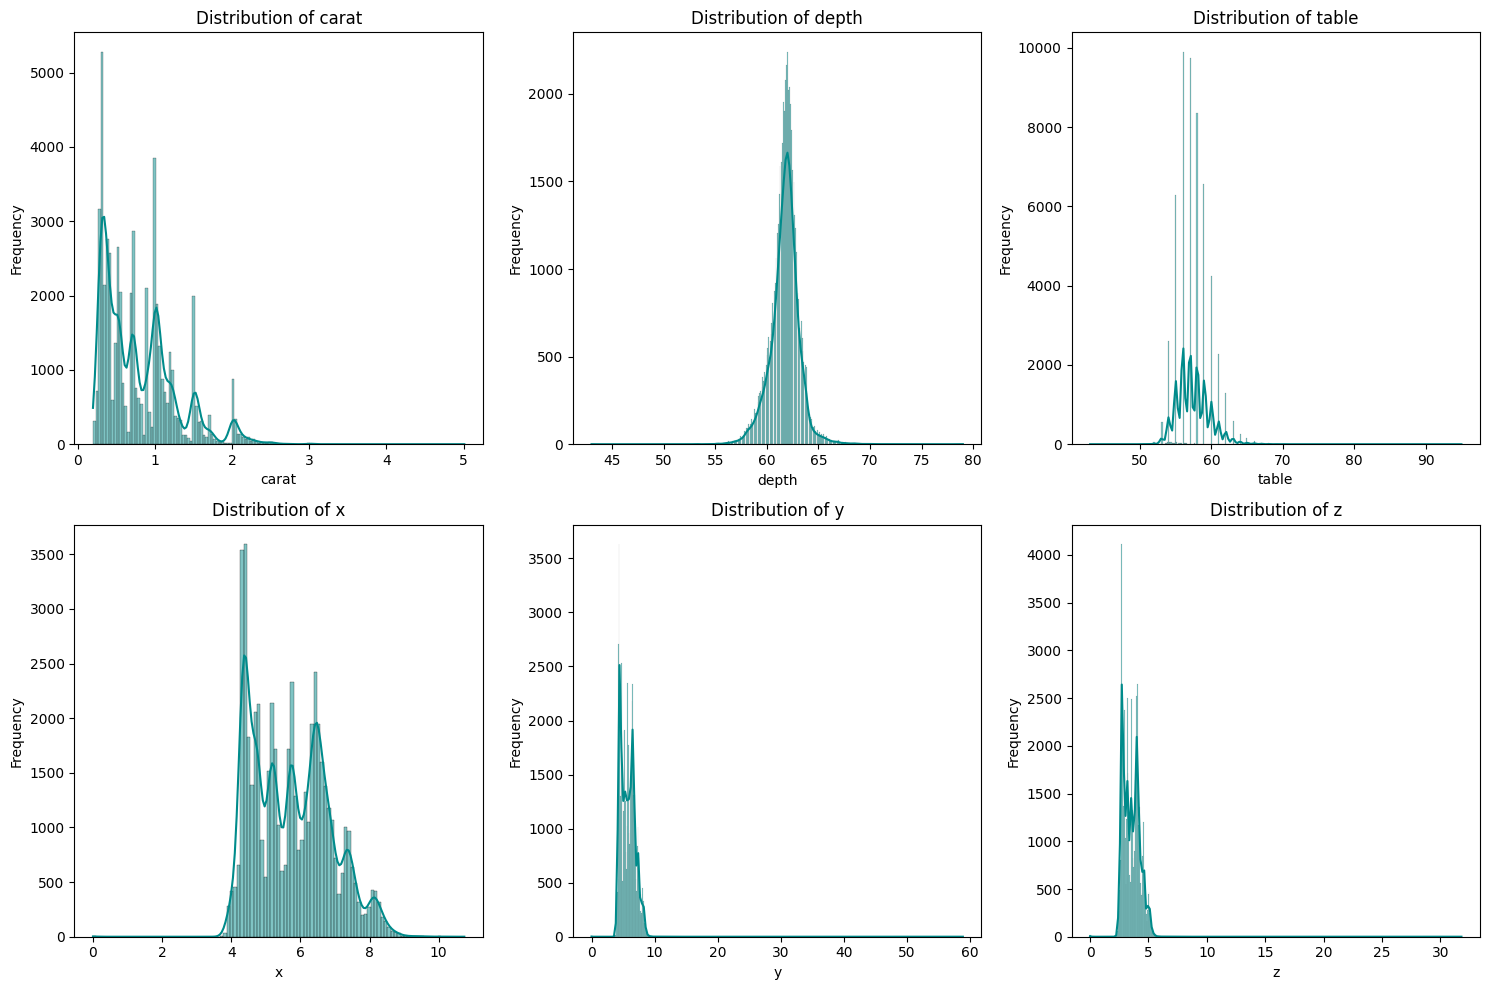

In [10]:
# Membuat distribusi untuk setiap fitur numerik dalam tata letak 2x3
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, feature in enumerate(numerical_features):
  sns.histplot(df[feature], kde=True, color='darkcyan', ax=axes[i//3, i%3])
  axes[i//3, i%3].set_title(f'Distribution of {feature}', size=12)
  axes[i//3, i%3].set_xlabel(feature, size=10)
  axes[i//3, i%3].set_ylabel('Frequency', size=10)
# Menyesuaikan tata letak
plt.tight_layout()
plt.show()

In [11]:
@interact
def plot_histogram(bin_width=(1, 20, 1)):
  for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    plt.hist(df[feature],bins=np.arange(min(df[feature]), max(df[feature])))
    plt.title(f'Histogram of {feature}', size=15)
    plt.xlabel(feature, size=12)
    plt.ylabel('Frequency', size=12)
    plt.show()

interactive(children=(IntSlider(value=10, description='bin_width', max=20, min=1), Output()), _dom_classes=('w…

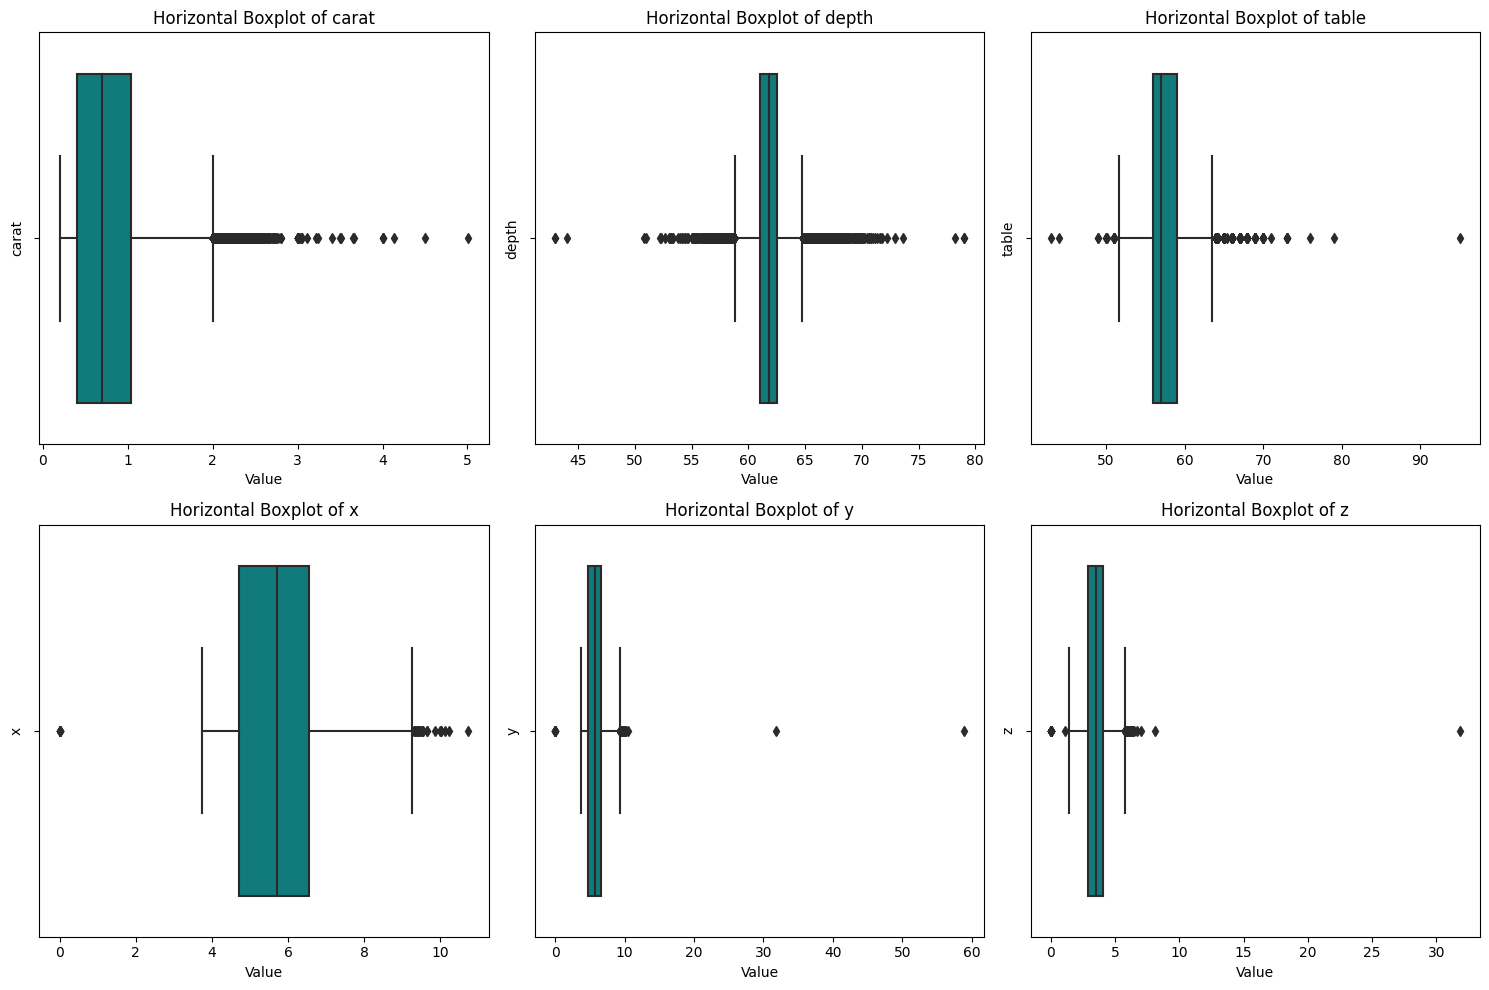

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    sns.boxplot(data=df, x=feature, color='darkcyan', orient='h', ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Horizontal Boxplot of {feature}', size=12)
    axes[i//3, i%3].set_xlabel('Value', size=10)
    axes[i//3, i%3].set_ylabel(feature, size=10)

# Menyesuaikan tata letak
plt.tight_layout()
plt.show()